In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualizing data
%matplotlib inline
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [175]:
df = pd.read_csv(r'C:\Users\ayush\Dropbox\PC\Downloads\Telco-Customer-Churn.csv',encoding='unicode_escape')

In [177]:
df.shape

(7043, 21)

In [179]:
df.head(6)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [183]:
 pd.isnull(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [185]:
pd.isnull(df).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [189]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [191]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [193]:
#use describbe for specific column
df[['tenure','MonthlyCharges']].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [195]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [209]:
column_transformer = ColumnTransformer(
    transformers=[
        ('nominal', OneHotEncoder(), ['Partner', 'Dependents', 'PhoneService'])
    ],
    remainder='passthrough'  # This will keep the other columns unchanged
)

In [211]:
transformed_data = column_transformer.fit_transform(df)

In [213]:
feature_names = column_transformer.get_feature_names_out()

In [215]:
transformed_df = pd.DataFrame(transformed_data, columns=feature_names)

print(transformed_df)

     nominal__Partner_No nominal__Partner_Yes nominal__Dependents_No  \
0                    0.0                  1.0                    1.0   
1                    1.0                  0.0                    1.0   
2                    1.0                  0.0                    1.0   
3                    1.0                  0.0                    1.0   
4                    1.0                  0.0                    1.0   
...                  ...                  ...                    ...   
7038                 0.0                  1.0                    0.0   
7039                 0.0                  1.0                    0.0   
7040                 0.0                  1.0                    0.0   
7041                 0.0                  1.0                    1.0   
7042                 1.0                  0.0                    1.0   

     nominal__Dependents_Yes nominal__PhoneService_No  \
0                        0.0                      1.0   
1                    

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [219]:
df.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

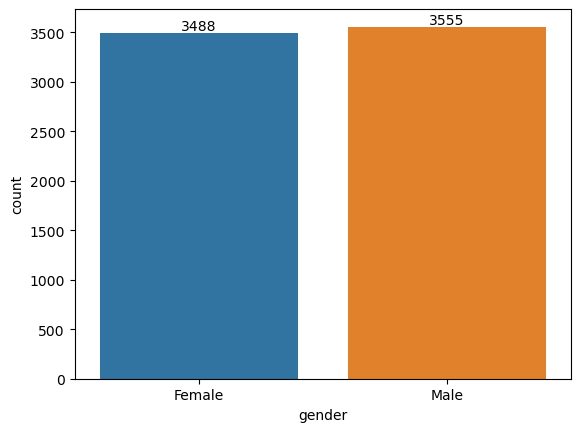

In [37]:
ax=sns.countplot(x='gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
#The graph shows that the number of male and female customers is fairly balanced.
#There are 3,555 male customers and 3,488 female customers.
#This suggests that the telecom service has a roughly equal appeal to both genders.
#A balanced gender distribution implies that gender is unlikely to be a biased predictor in the churn analysis.

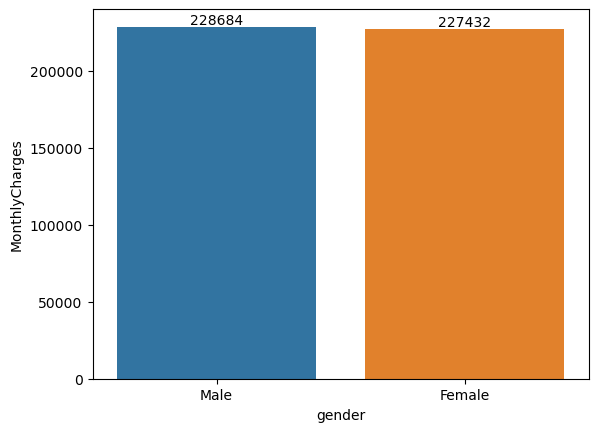

In [45]:
charges=df.groupby(['gender'],as_index=False)['MonthlyCharges'].sum().sort_values(by='MonthlyCharges',ascending=False)
Monthly=sns.barplot(x='gender',y='MonthlyCharges',data=charges)
for bars in Monthly.containers:
    Monthly.bar_label(bars)
plt.show()

In [ ]:
#The total monthly charges for males are slightly higher than for females. 
# Specifically, males contribute a total of 228,684 in monthly charges,
# whereas females contribute 227,432. 
# This indicates that there is a relatively even distribution of monthly charges between genders, with a minor difference.
# For churn prediction, this balance implies that gender might not be a primary factor in determining churn.

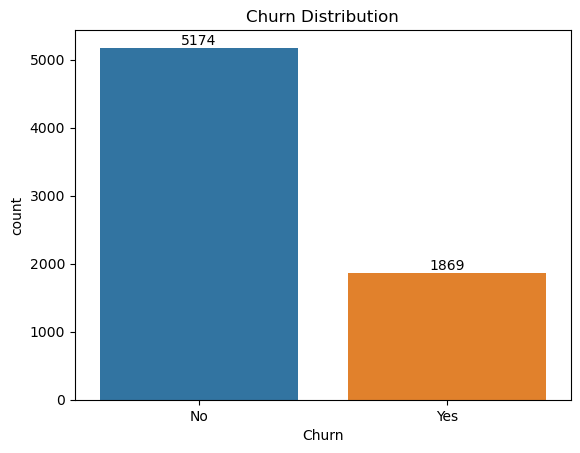

In [47]:
count=sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
for bars in count.containers:
    count.bar_label(bars)
plt.show()

In [ ]:
#The graph indicates that there are 5,174 customers who did not churn ("No") and 1,869 customers who did churn ("Yes").
#By calculating the churn rate : Number of churned customers/Total number of customers =1869/(5174+1869)=26.5%(approx)
#This churn rate of approximately 26.5% indicates that about one-quarter of the customers are leaving the service, 
#which is a considerable proportion and could be a point of concern for the telecom company.
#The high number of customers who have not churned (5,174) suggests that the majority are satisfied or find the service meeting their needs.
#This is a positive sign for the company's retention efforts.

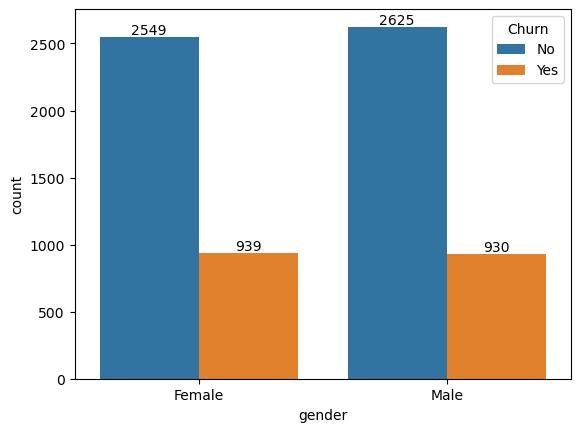

In [49]:
churn=sns.countplot(data=df,x='gender',hue='Churn')
for bars in churn.containers:
    churn.bar_label(bars)

In [ ]:
#For females, there are 2,549 non-churning customers and 939 churning customers.
#For males, there are 2,625 non-churning customers and 930 churning customers.
# After calculating the churn rate by gender we get: Female churn rate =26.9%(approx) and Male churn rate =26.2%(approx)

C:\Users\ayush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


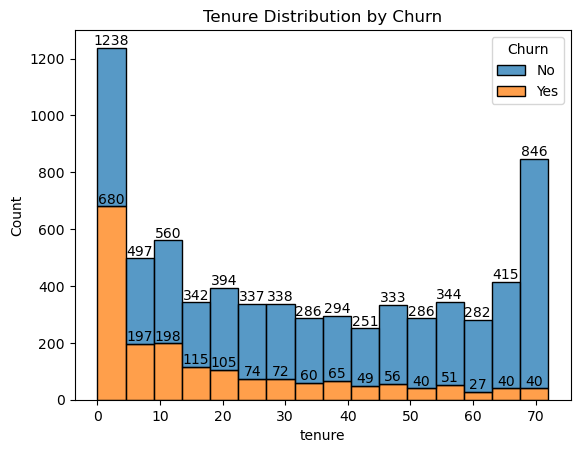

In [51]:
tenure=sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack')
plt.title('Tenure Distribution by Churn')
for bars in tenure.containers:
    tenure.bar_label(bars)
plt.show()

In [ ]:
#There is a high count of customers who churned early in their tenure (tenure close to 0). 
#Specifically, there are 497 churned customers out of 1238 in the first bin, 
#which indicates that many customers tend to leave the service shortly after joining.
#This suggests that the initial experience with the service is crucial and may need improvement to reduce early churn.
#As tenure increases, the number of churned customers decreases significantly. For example, in the 10-20 tenure range, 
#the churn count drops to around 115-198.
#This indicates that customers who stay longer with the company are less likely to churn, suggesting loyalty increases with time.
#For tenures beyond 20 months, the churn count stabilizes at a low number. The counts remain fairly low and consistent (e.g., 74, 72, 49, 56, etc.) across the higher tenure ranges.
#This trend indicates that once customers surpass a certain tenure threshold, their likelihood of staying with the service increases significantly.
#At the highest tenure value (around 70 months), there is a notable peak in the count of non-churned customers (846) with a relatively small number of churned customers (40).

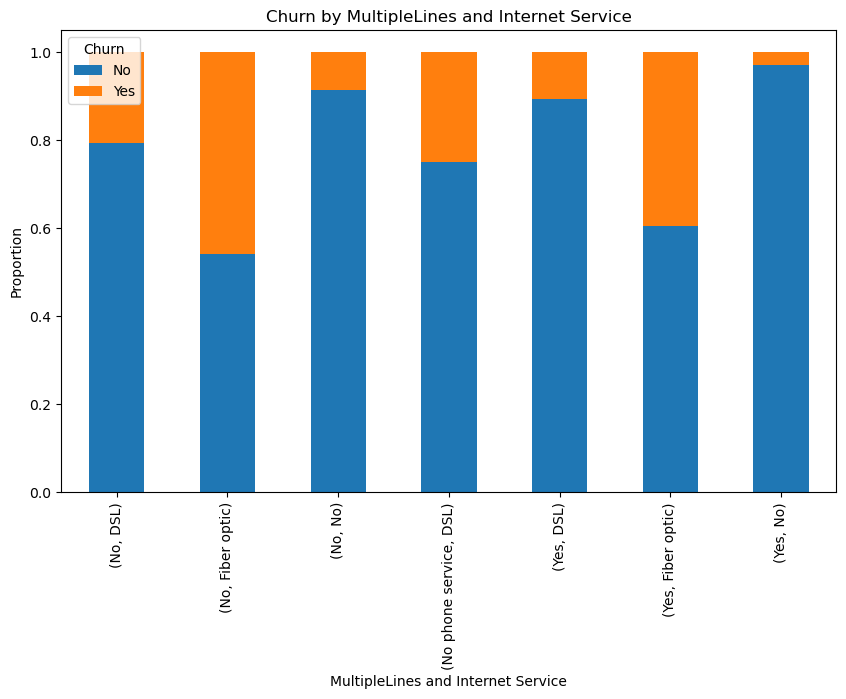

In [53]:
multi_internet_churn = pd.crosstab(index=[df['MultipleLines'], df['InternetService']], columns=df['Churn'], normalize='index')
multi_internet_churn.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Churn by MultipleLines and Internet Service')
plt.xlabel('MultipleLines and Internet Service')
plt.ylabel('Proportion')
plt.show()

In [ ]:
#Customers with fiber optic service tend to have higher churn rates compared to those with DSL or no internet service.
#Customers with DSL service have lower churn rates compared to fiber optic users.
#Customers without internet service and multiple lines exhibit one of the lowest churn rates
#For customers with no phone service but using DSL, the churn rate is relatively low. This group has a strong proportion of non-churned customers, 
#suggesting satisfaction with the DSL service.

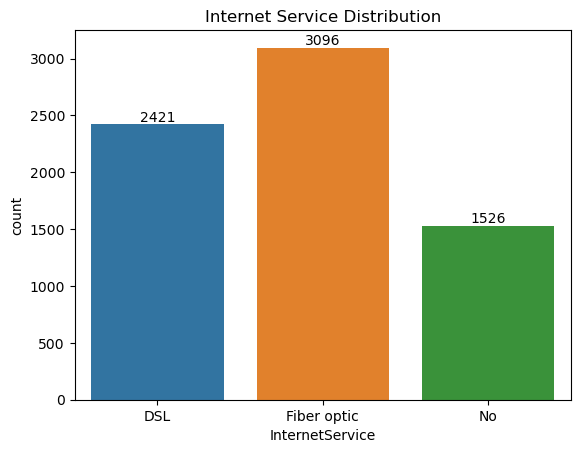

In [55]:
isd=sns.countplot(x='InternetService', data=df)
plt.title('Internet Service Distribution')
for bars in isd.containers:
    isd.bar_label(bars)
plt.show()

C:\Users\ayush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


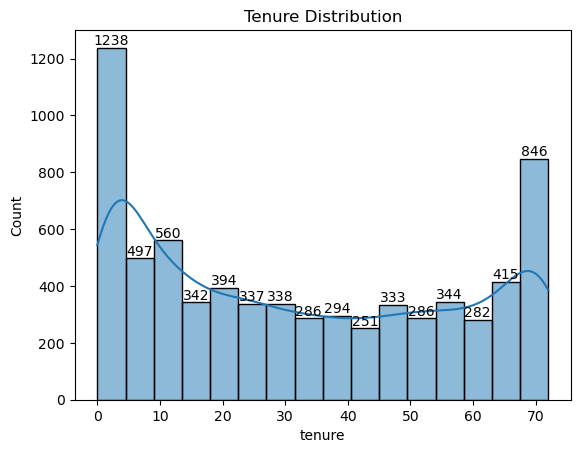

In [57]:
td=sns.histplot(df['tenure'], kde=True)
plt.title('Tenure Distribution')
for bars in td.containers:
    td.bar_label(bars)
plt.show()

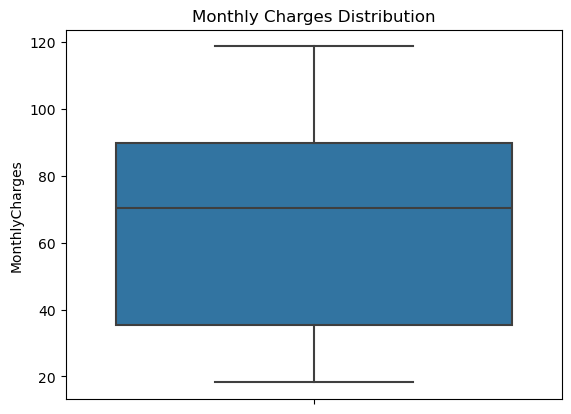

In [59]:
sns.boxplot(y='MonthlyCharges', data=df)
plt.title('Monthly Charges Distribution')
plt.show()

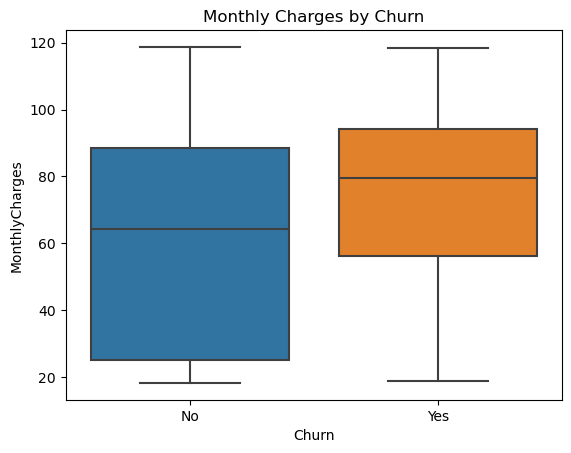

In [61]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.show()

C:\Users\ayush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ayush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


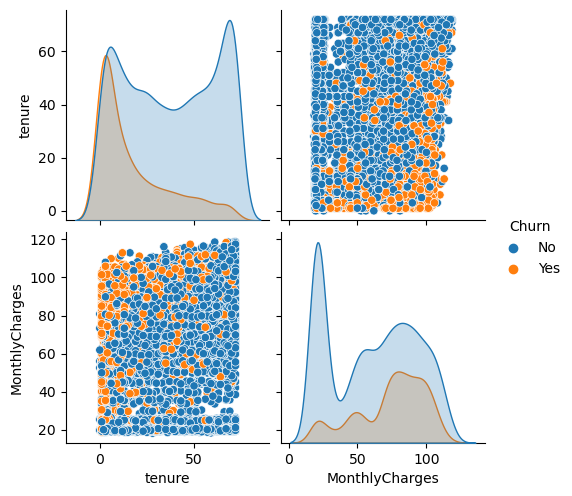

In [63]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()

In [ ]:
# Tenure distribution :The density plot for ‘tenure’ shows two peaks, suggesting there are two groups of customers based on tenure length – one group appears to be newer customers 
#while the other consists of long-term customers.
# Churn and Tenure :The scatter plot shows a concentration of churned customers (blue points) within lower tenure lengths. 
#This indicates that newer customers are more likely to churn.
#Churn and Monthly Charges:There’s a visible concentration of higher monthly charges among churned customers. 
#This suggests that higher charges may correlate with an increased likelihood of customer turnover.


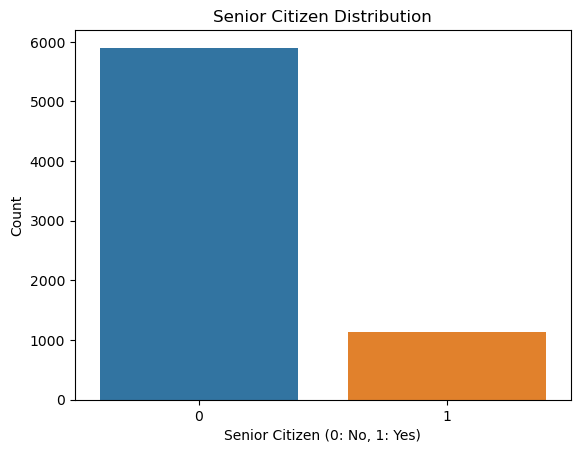

In [64]:
sns.countplot(x='SeniorCitizen', data=df)
plt.title('Senior Citizen Distribution')
plt.xlabel('Senior Citizen (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

In [67]:
df.shape

(7043, 21)

In [221]:
from sklearn.preprocessing import LabelEncoder

In [223]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [225]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [227]:
label_encoders = {}
for column in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
               'PaperlessBilling', 'PaymentMethod']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

In [229]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [231]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [235]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [237]:
y_pred = rf_model.predict(X_test)

In [239]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


In [241]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [ ]:
#Class 0 (Non-churn): The precision is 0.83, meaning that when the model predicts a customer will not churn, it is correct 83% of the time.
#Class 1 (Churn): The precision is lower at 0.66, indicating that when the model predicts a customer will churn, it is correct 66% of the time.
#Class 0 (Non-churn): The recall is 0.91, meaning that the model correctly identifies 91% of the actual non-churned customers.
#Class 1 (Churn): The recall is 0.47, indicating that the model correctly identifies only 47% of the actual churned customers.
#Class 0 (Non-churn): The F1-score is 0.87, which is a balance between precision and recall.
#Class 1 (Churn): The F1-score is 0.55, indicating moderate performance.

In [243]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[945  91]
 [197 176]]
